In [1]:
#confidence Interval
import pandas as pd
import numpy as np
import scipy.stats as stats

data=pd.read_csv("adult.csv")
age=data["fnlwgt"]

meanAge=np.mean(age)
stdAge=np.std(age,ddof=1)
n=len(age)

conLevel=0.95
alpha=1-conLevel
zscore=stats.norm.ppf(1-alpha/2)
marginoferror=zscore*(stdAge/np.sqrt(n))

confidenceInterval=(meanAge-marginoferror,meanAge+marginoferror)
print(confidenceInterval)

(188631.91056959727, 190924.82245457277)


In [ ]:
We find confidence intervals to quantify the uncertainty around sample estimates 
and make informed decisions about a population
parameter.

<module 'matplotlib.pyplot' from 'C:\\Users\\kkpr2\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\pyplot.py'>

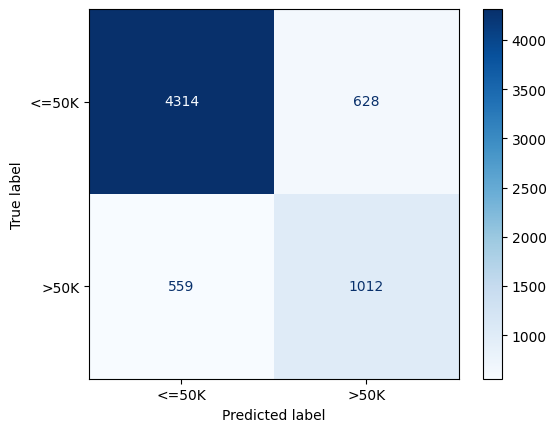

In [14]:
#confusion matrix

import pandas as pd
from sklearn.model_selection import train_test_split #sci-kit learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

df=pd.read_csv("adult.csv")

df=pd.get_dummies(df,columns=['workclass','education','marital-status','occupation','relationship',
                             'race','sex','nativeCountry'],drop_first=True)

X=df.drop('income',axis=1)
y = df['income'].apply(lambda x: 1 if x == '>50K' else 0)


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=DecisionTreeClassifier()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)

disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['<=50K','>50K'])
disp.plot(cmap=plt.cm.Blues)
plt
